In [1]:
!pip3 install opencv-python
# this is a bug fix, on advice from mentor Ayush

    100% |████████████████████████████████| 25.0MB 25kB/s  eta 0:00:01  6% |██                              | 1.5MB 10.5MB/s eta 0:00:03    8% |██▊                             | 2.1MB 12.4MB/s eta 0:00:02    15% |████▉                           | 3.8MB 17.9MB/s eta 0:00:02    24% |███████▉                        | 6.1MB 27.6MB/s eta 0:00:01    34% |███████████▏                    | 8.7MB 29.0MB/s eta 0:00:01    45% |██████████████▌                 | 11.3MB 29.7MB/s eta 0:00:01    64% |████████████████████▊           | 16.2MB 28.0MB/s eta 0:00:01    84% |███████████████████████████     | 21.1MB 23.2MB/s eta 0:00:01    94% |██████████████████████████████▎ | 23.6MB 22.1MB/s eta 0:00:01    99% |███████████████████████████████▉| 24.8MB 25.5MB/s eta 0:00:01
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# 1 (Camera Calibration)

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#%matplotlib qt

# prepare object points
nx = 9 #number of inside corners in x
ny = 6 #number of inside corners in y

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
#print(objp) yields
#[[ 0.  0.  0.]
# [ 1.  0.  0.]
# [ 2.  0.  0.]
# [ 3.  0.  0.]
# ...

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/*.jpg')
#print(type(images))  images is a pyton list

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        write_name = 'corners_found/corners_found'+str(idx)+'.jpg'
        cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        #plt.imshow(img) #cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()



In [3]:
print(objpoints[3].shape)
print(imgpoints[3].shape)


(54, 3)
(54, 1, 2)


Text(0.5,1,'Undistorted Image')

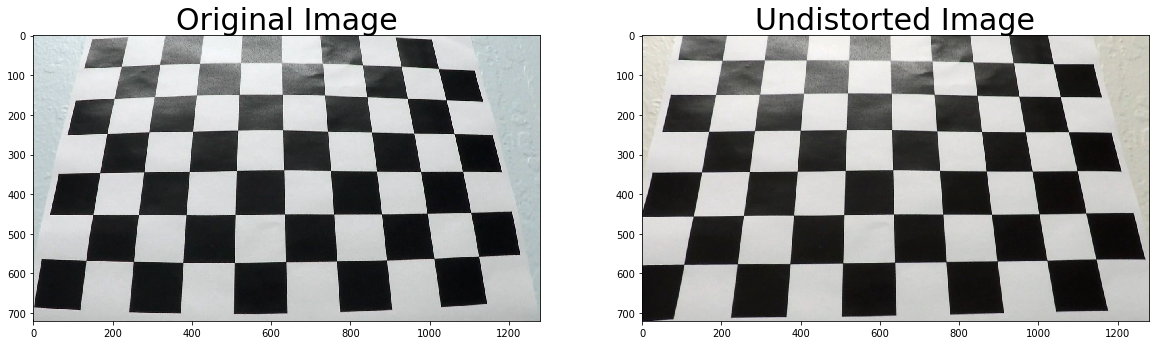

In [4]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('./camera_cal/calibration3.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('./camera_cal/calibration3_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "./camera_cal/wide_dist_pickle.p", "wb" ) )
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)
#cv2.imwrite('./camera_cal/calibration3_compare.jpg',f)

# 2 (Pipeline (single images))

## 2.1 Provide an example of a distortion-corrected image.

Text(0.5,1,'Undistorted Image')

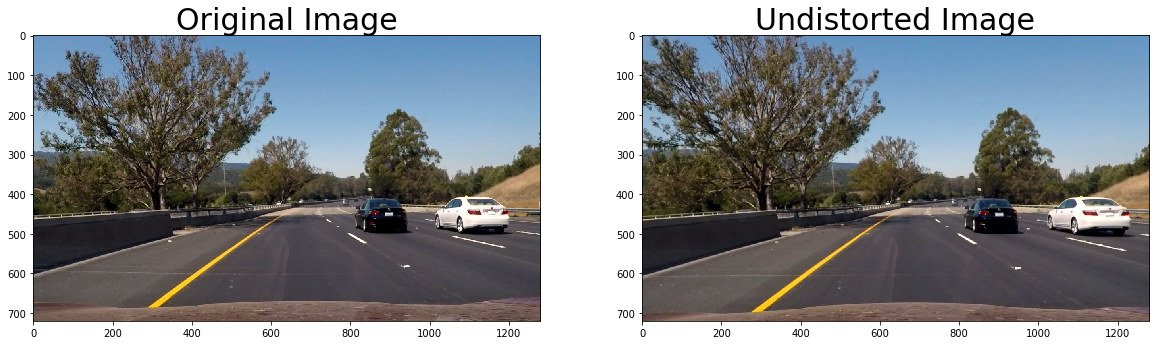

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

#reading in an image
#image = mpimg.imread('test_images/test1.jpg')
#image = mpimg.imread('test_images/test2.jpg')
#image = mpimg.imread('test_images/test3.jpg')
#image = mpimg.imread('test_images/test4.jpg') # difficult one
#image = mpimg.imread('test_images/test5.jpg') # curvature uneven 
image = mpimg.imread('test_images/test6.jpg')
#image = mpimg.imread('test_images/straight_lines1.jpg')
#image = mpimg.imread('test_images/straight_lines2.jpg')

original_image=image # for further reference for plotting things

dist_pickle = pickle.load( open( "./camera_cal/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

#printing out some stats and plotting

image_undistorted = cv2.undistort(image, mtx, dist, None, mtx)
#cv2.imwrite('./test_images/test1_undist.jpg',dst)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(image_undistorted)
ax2.set_title('Undistorted Image', fontsize=30)

## 2.2 Create thresholded binary image.

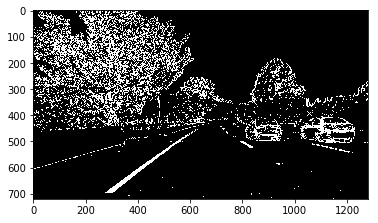

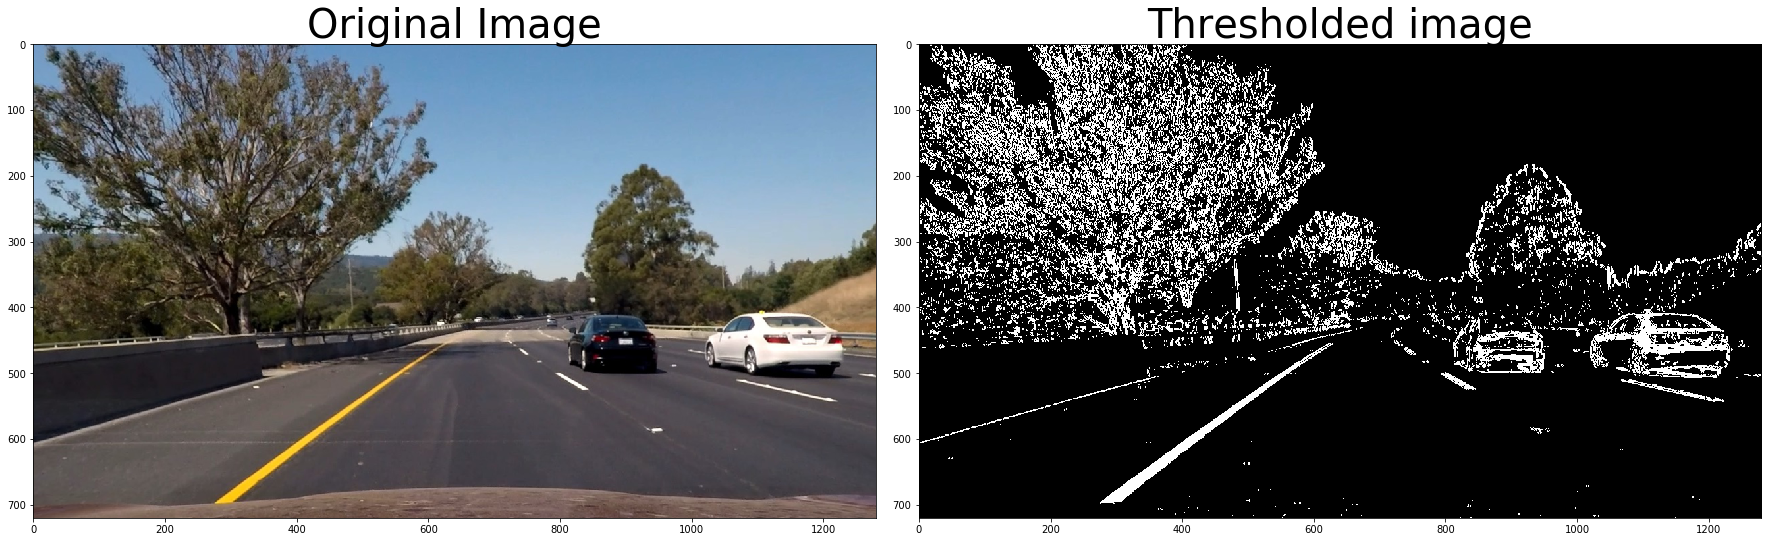

In [6]:
image = image_undistorted   # use undistorted image from last step in pipeline
original_image_undistorted=image_undistorted # for further reference for plotting things


# Edit this function to create your own pipeline.
def thresholding(img, s_thresh=(170, 255), sx_thresh=(20, 100)): #s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    
    return color_binary, combined_binary
    
result, result_gray = thresholding(image)

plt.imshow(result_gray,cmap='gray')

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

#ax2.set_title('Combined S channel and gradient thresholds')
#ax2.imshow(combined_binary, cmap='gray')

ax2.imshow(result_gray,cmap='gray')
ax2.set_title('Thresholded image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)



## 2.3 Apply perspective transform.

(720, 1280)


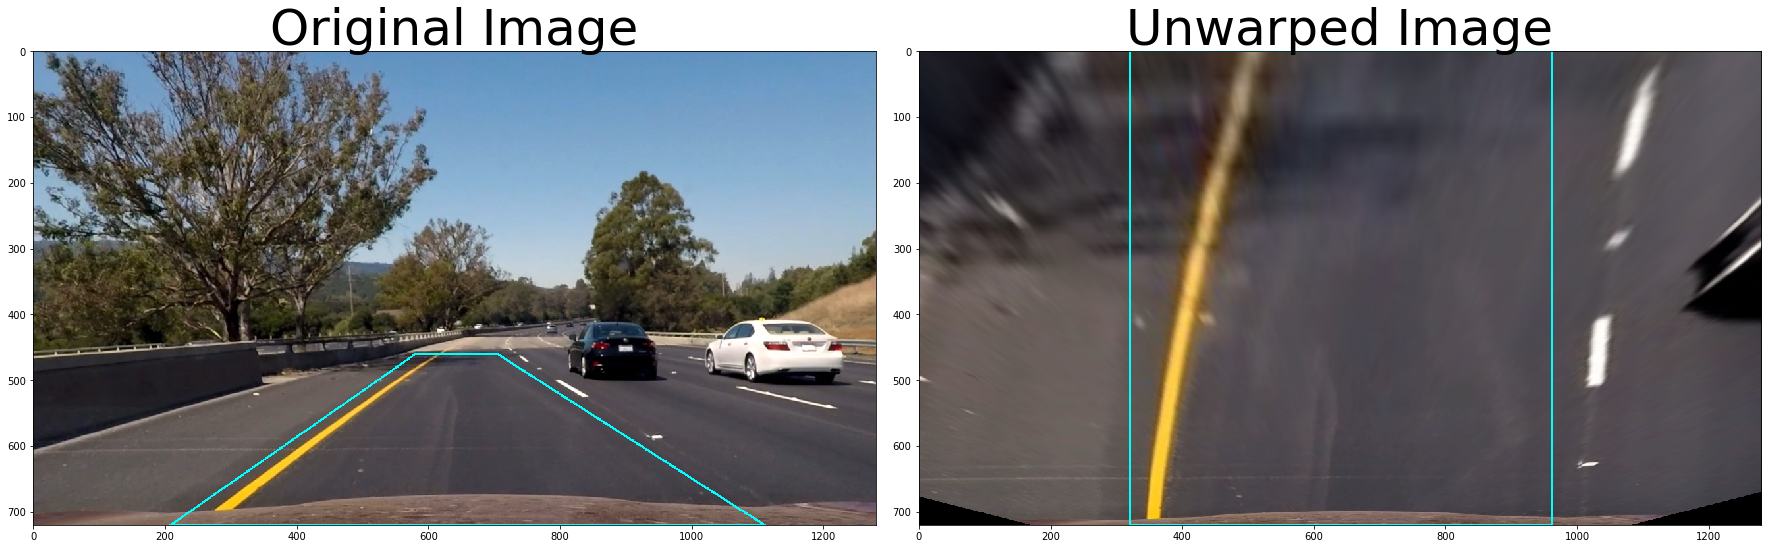

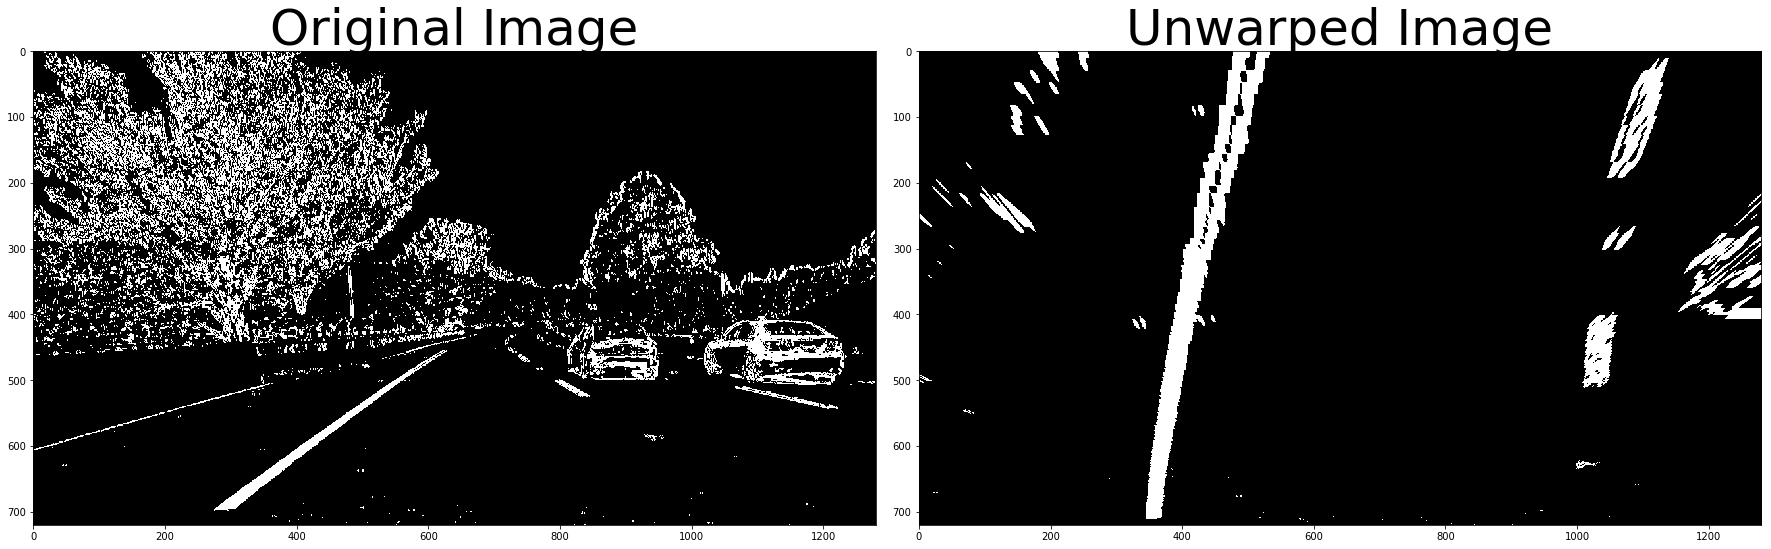

In [7]:
image = result_gray   # use undistorted and thresholded image from last step in pipeline
print(image.shape)


def unwarp(img):
    img_size=(img.shape[1],img.shape[0])
    src = np.float32(
     [[(img_size[0] / 2) - 60, img_size[1] / 2 + 100],
     [((img_size[0] / 6) - (5)), img_size[1]],
     [(img_size[0] * 5 / 6) + 45, img_size[1]],
     [(img_size[0] / 2 + 65), img_size[1] / 2 + 100]])
    dst = np.float32(
     [[(img_size[0] / 4), 0],
     [(img_size[0] / 4), img_size[1]],
     [(img_size[0] * 3 / 4), img_size[1]],
     [(img_size[0] * 3 / 4), 0]])
    # use cv2.getPerspectiveTransform() to get M, the transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    # use cv2.warpPerspective() to warp your image to a top-down view
    warped=cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped, M, src, dst
    
# the following is for the pipeline    
top_down_gray, perspective_M, src, dst = unwarp(result_gray)

#the remainder is only for plotting pictures for the writeup
top_down, perspective_M, src, dst = unwarp(original_image_undistorted)

src = src.reshape((-1,1,2))
orig_plus_polygon=cv2.polylines(original_image_undistorted,np.int32([src]),True,(0,255,255),2)
dst = dst.reshape((-1,1,2))
top_down_plus_polygon=cv2.polylines(top_down,np.int32([dst]),True,(0,255,255),2)

#print(perspective_M.shape)original_image_undistorted
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(orig_plus_polygon)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down_plus_polygon)
ax2.set_title('Unwarped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


#print(perspective_M.shape)original_image_undistorted
#print(top_down.shape)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(result_gray,cmap='gray')
#ax1.imshow(image,cmap='gray')
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down_gray,cmap='gray')
ax2.set_title('Unwarped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## 2.4 Fit lines with polynomial.

3
506
1120
640
352


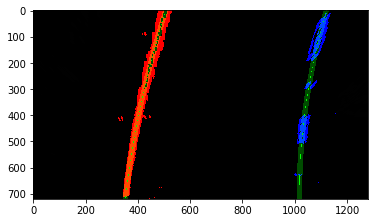

In [8]:
binary_warped = top_down_gray  #use image from last step in pipeline
#print(binary_warped.shape)

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//3:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))#*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 125  # increased from 100 (classroom quiz)
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ###  Find the four below boundaries of the window ###
        win_xleft_low = leftx_current- margin
        win_xleft_high = leftx_current+ margin   
        win_xright_low = rightx_current- margin   
        win_xright_high = rightx_current+ margin  
        
        # optional: Draw the windows on the visualization image
        #cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        #cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        
        ###  Identify the nonzero pixels in x and y within the window ###
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) 
                          &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) 
                          &  (nonzerox < win_xright_high)).nonzero()[0]
        
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
        if good_left_inds.size > minpix:
            leftx_current=np.int(np.mean(nonzerox[good_left_inds]))
        if good_right_inds.size > minpix:
            rightx_current=np.int(np.mean(nonzerox[good_right_inds]))
        
    # Concatenate the arrays of indices (previously was a list of lists of pixels)
   
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)


    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    ### Fit a second order polynomial to each using `np.polyfit` ###
    left_fit = np.polyfit(lefty, leftx,2)
    #print(left_fit)
    right_fit = np.polyfit(righty, rightx,2)
    #print(right_fit)

    # Generate x and y values for plotting
    ploty = np.int32(np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )) 
    left_fitx = np.int32(left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2])
    right_fitx = np.int32(right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2])
    print(ploty[3])
    print(left_fitx[3])
    print(right_fitx[3])
    
    print(lefty[3])
    print(leftx[3])

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]
    out_img[ploty, left_fitx] = [0, 255, 0]
    out_img[ploty, right_fitx] = [0, 255, 0]

    # Plots the left and right polynomials on the lane lines
    #plt.plot(left_fitx, ploty, color='yellow',linewidth=4.0)
    #plt.plot(right_fitx, ploty, color='yellow',linewidth=4.0)
    
    
    # Draw the lane onto the  image
    #out_img = np.dstack((binary_warped, binary_warped, binary_warped)) *255
    window_img = np.zeros_like(out_img)
    margin=np.int32(10)
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))
    cv2.fillPoly(window_img, np.int32([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int32([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

    return result,ploty, left_fit,right_fit


out_img, ploty, left_fit,right_fit = fit_polynomial(binary_warped)

plt.imshow(out_img)


## 2.5 Compute curvature and offset in metres.

In [9]:
def convert_to_metres(ploty, left_fit,right_fit , ym_per_pix, xm_per_pix):
    '''
    converts/rescales all coefficients etc. to metres
    '''
    
    #ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
    #leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
    #                                for y in ploty])
    #rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
    #                                for y in ploty])
    leftx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    rightx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    

    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1]  # Reverse to match top-to-bottom in y

    # Fit a second order polynomial to pixel positions in each fake lane line
    ##### Fit new polynomials to x,y in world space #####
    ##### Utilize `ym_per_pix` & `xm_per_pix` here #####
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    
    return ploty*ym_per_pix, left_fit_cr, right_fit_cr

    
def measure_curvature_and_offset_real(ploty, left_fit,right_fit):
    '''
    Calculates the curvature of polynomial functions in meters.
    '''
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    # Start by generating our fake example data
    # Make sure to feed in your real data instead in your project!
    ploty_cr, left_fit_cr, right_fit_cr = convert_to_metres(ploty, left_fit,right_fit,ym_per_pix, xm_per_pix)
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty_cr)
    
    ##### Implement the calculation of R_curve (radius of curvature) #####
    A=left_fit_cr[0]
    B=left_fit_cr[1]
    left_curverad = 1/(2*A)* (1+(2*A*y_eval+B)**2)**(3/2)  ## Implement the calculation of the left line here
    A=right_fit_cr[0]
    B=right_fit_cr[1]
    right_curverad = 1/(2*A)* (1+(2*A*y_eval+B)**2)**(3/2)   ## Implement the calculation of the right line here
    
    #compute offset 
    leftx_bot = left_fit_cr[0]*y_eval**2 + left_fit_cr[1]*y_eval + left_fit_cr[2]
    rightx_bot = right_fit_cr[0]*y_eval**2 + right_fit_cr[1]*y_eval + right_fit_cr[2]
    avx_bot=1/2*(leftx_bot +rightx_bot)
    offset_x_m= 1280/2*xm_per_pix -avx_bot
    return left_curverad, right_curverad,offset_x_m


# Calculate the radius of curvature in meters for both lane lines
left_curverad, right_curverad, offset_x_m = measure_curvature_and_offset_real(ploty, left_fit,right_fit )

print(left_curverad, 'm', right_curverad, 'm', offset_x_m, 'm')


1184.63843705 m 805.002946968 m -0.922238088412 m


## 2.5 Projecting back to the road.

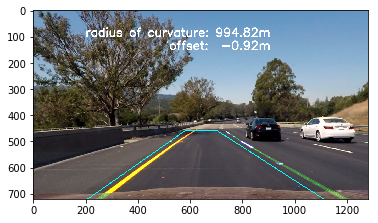

In [41]:
def warp_again(img):
    img_size=(img.shape[1],img.shape[0])
    src = np.float32(
     [[(img_size[0] / 2) - 60, img_size[1] / 2 + 100],
     [((img_size[0] / 6) - (5)), img_size[1]],
     [(img_size[0] * 5 / 6) + 45, img_size[1]],
     [(img_size[0] / 2 + 65), img_size[1] / 2 + 100]])
    dst = np.float32(
     [[(img_size[0] / 4), 0],
     [(img_size[0] / 4), img_size[1]],
     [(img_size[0] * 3 / 4), img_size[1]],
     [(img_size[0] * 3 / 4), 0]])
    # use cv2.geimage_undistortedtPerspectiveTransform() to get M, the transform matrix
    M = cv2.getPerspectiveTransform( dst,src) # other way round!!
    # use cv2.warpPerspective() to warp your image to a top-down view
    warped=cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped, M, src, dst
def project_back(img,left_curverad, right_curverad,offset_x_m):
    warped_again, M, src, dst = warp_again(img)
    finalpic = cv2.addWeighted(image_undistorted, 1, warped_again, 0.9, 0)
    font = cv2.FONT_HERSHEY_SIMPLEX
    curverad=1/2*(right_curverad+left_curverad)
    string1= 'radius of curvature: '+str(round(curverad,2))+'m'
    string2='offset:  '+str(round(offset_x_m,2))+'m'
    cv2.putText(finalpic,string1,(200,100), font, 1.5,(255,255,255),4,cv2.LINE_AA)
    cv2.putText(finalpic,string2,(520,150), font, 1.5,(255,255,255),4,cv2.LINE_AA)
    return finalpic
finalpic=project_back(out_img,left_curverad, right_curverad,offset_x_m )
plt.imshow(finalpic)